<a href="https://colab.research.google.com/github/danisimoneaux/IS4487/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [44]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/daily_aqi_by_county_2021.csv')

Mounted at /content/gdrive


In [45]:
#look at the top rows
df.head(10) 

State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2021-01-01   27      Good   
1    Alabama     Baldwin           1            3  2021-01-04   47      Good   
2    Alabama     Baldwin           1            3  2021-01-07   24      Good   
3    Alabama     Baldwin           1            3  2021-01-10   39      Good   
4    Alabama     Baldwin           1            3  2021-01-13   46      Good   
5    Alabama     Baldwin           1            3  2021-01-16   21      Good   
6    Alabama     Baldwin           1            3  2021-01-19   52  Moderate   
7    Alabama     Baldwin           1            3  2021-01-22   11      Good   
8    Alabama     Baldwin           1            3  2021-01-25   39      Good   
9    Alabama     Baldwin           1            3  2021-01-28   22      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  
5              PM2.5   01-003-0010                          1  
6              PM2.5   01-003-0010                          1  
7              PM2.5   01-003-0010                          1  
8              PM2.5   01-003-0010                          1  
9              PM2.5   01-003-0010                          1

In [46]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218196 entries, 0 to 218195
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 218196 non-null  object
 1   county Name                218196 non-null  object
 2   State Code                 218196 non-null  int64 
 3   County Code                218196 non-null  int64 
 4   Date                       218196 non-null  object
 5   AQI                        218196 non-null  int64 
 6   Category                   218196 non-null  object
 7   Defining Parameter         218196 non-null  object
 8   Defining Site              218196 non-null  object
 9   Number of Sites Reporting  218196 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.6+ MB


In [47]:
#describe the data before cleaning it
df.describe()

State Code    County Code            AQI  Number of Sites Reporting
count  218196.000000  218196.000000  218196.000000              218196.000000
mean       30.178390      82.098265      39.584250                   1.924220
std        15.755914      89.555906      21.547055                   2.251967
min         1.000000       1.000000       0.000000                   1.000000
25%        18.000000      25.000000      29.000000                   1.000000
50%        30.000000      61.000000      38.000000                   1.000000
75%        42.000000     111.000000      47.000000                   2.000000
max        80.000000     810.000000    2723.000000                  34.000000

## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [49]:
#Clean Data
df = df[(df['county Name'] == "Salt Lake")]

df.loc[df["Category"] == "Good", "Category"] = 0
df.loc[df["Category"] == "Moderate", "Category"] = 1
df.loc[df["Category"] == "Unhealthy for Sensitive Groups", "Category"] = 2
df.loc[df["Category"] == "Unhealthy", "Category"] = 3
df.loc[df["Category"] == "Very Unhealthy", "Category"] = 4
df.loc[df["Category"] == "Hazardous", "Category"] = 5

df = df.dropna

In [50]:
print(df)

<bound method DataFrame.dropna of        State Name county Name  State Code  County Code        Date  AQI  \
193138       Utah   Salt Lake          49           35  2021-01-01   70   
193139       Utah   Salt Lake          49           35  2021-01-02   48   
193140       Utah   Salt Lake          49           35  2021-01-03   51   
193141       Utah   Salt Lake          49           35  2021-01-04   52   
193142       Utah   Salt Lake          49           35  2021-01-05   37   
...           ...         ...         ...          ...         ...  ...   
193438       Utah   Salt Lake          49           35  2021-10-28   30   
193439       Utah   Salt Lake          49           35  2021-10-29   40   
193440       Utah   Salt Lake          49           35  2021-10-30   51   
193441       Utah   Salt Lake          49           35  2021-10-31   64   
193442       Utah   Salt Lake          49           35  2021-11-01    6   

       Category Defining Parameter Defining Site  Number of Sites

# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [52]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df['leave'] = df['leave'].astype('category')
df['college'] = df['college'].astype('category')
df['reported_satisfaction'] = df['reported_satisfaction'].astype('category')
df['reported_usage_level'] = df['reported_usage_level'].astype('category')
df['considering_change_of_plan'] = df['considering_change_of_plan'].astype('category')

df.info()

TypeError: ignored

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [13]:
#Add new field with binary value for leave  
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')  
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')

#Convert to integer
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')

#Find the mean value
df_clean['leave_flag'].mean()


0.4941930316379656

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [14]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house']]
y = df_clean['leave']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)


## Preview the tree


In [15]:
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_1 <= 600255.50
|   |--- feature_1 <= 319103.00
|   |   |--- feature_1 <= 316869.50
|   |   |   |--- feature_0 <= 147861.50
|   |   |   |   |--- feature_0 <= 146324.00
|   |   |   |   |   |--- feature_1 <= 247683.00
|   |   |   |   |   |   |--- feature_1 <= 244840.50
|   |   |   |   |   |   |   |--- feature_0 <= 22184.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 231854.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 20394.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 20114.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: STAY
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  20114.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: LEAVE
|   |   |   |   |   |   |   |   |   |--- feature_0 >  20394.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 225750.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  225750.00
|   |   |

## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [16]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 1.0


## Prune the tree

Limit the number of levels to 2

In [17]:
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=18)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)


## Preview the new tree

In [18]:
money_tree2_text = tree.export_text(money_tree2)
print(money_tree2_text)

|--- feature_1 <= 600255.50
|   |--- feature_1 <= 319103.00
|   |   |--- feature_1 <= 316869.50
|   |   |   |--- feature_0 <= 147861.50
|   |   |   |   |--- feature_0 <= 146324.00
|   |   |   |   |   |--- feature_0 <= 146155.00
|   |   |   |   |   |   |--- feature_0 <= 146076.50
|   |   |   |   |   |   |   |--- feature_1 <= 248232.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 248021.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 247683.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 247525.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  247525.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: STAY
|   |   |   |   |   |   |   |   |   |--- feature_1 >  247683.00
|   |   |   |   |   |   |   |   |   |   |--- class: LEAVE
|   |   |   |   |   |   |   |   |--- feature_1 >  248021.00
|   |   |   |   |   |   |   |   |   |--- class: STAY
|   |   |   |   |   |   |   |--

## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [19]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.7380857028434121


## Visualize the model

In [20]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Fit a full tree model

Use all of the independent attributes.  We'll call this the "full tree." 

What is the accuracy of the full tree? 

In [ ]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house','college','overage','leftover','handset_price','over_15mins_calls_per_month','average_call_duration','reported_satisfaction','reported_usage_level','considering_change_of_plan']]
y = df_clean['leave']

full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x,y)


##Visualize the full tree

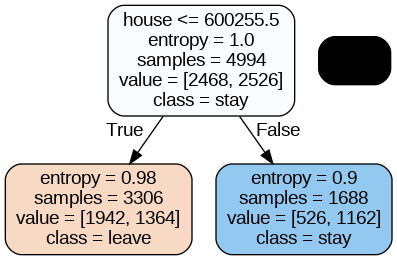

In [ ]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

In [ ]:
pred = full_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

##Test and Train
Now we will split the dataset into 80% training data and 20% test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##Create a new tree using only training data

In [ ]:
train_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree Classifer
train_tree = train_tree.fit(x_train,y_train)

##Apply the new tree to our test data

In [ ]:
pred = train_tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))

## Visualize the trained tree

In [ ]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(train_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Did the model improve?
👎  👍